In [33]:
#k4
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
print(np.exp(1603/(1.987*1182)))
print(np.exp(-11980/(1.987*1182)))
A_1 = Symbol('A_1',nonzero=True)
A_2 = Symbol('A_2',nonzero=True)
res=solve([Eq(1.9788668740030118*A_1 +0.006091643665951741*A_2,1.38e12)],[A_1,A_2])
print(res)

1.9788668740030118
0.006091643665951741
{A_1: -0.00307834940590474*A_2 + 697368791266.098}


In [35]:
a2 = 4e13
-0.00307834940590474*a2 + 697368791266.098

574234815029.9084

In [36]:
574234815029.9084*1.9788668740030118 + 0.006091643665951741*4e13

1380000000000.0022

In [41]:
#k4 high temperature 
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
A_1 = Symbol('A_1',nonzero=True)
A_2 = Symbol('A_2',nonzero=True)
res=solve([Eq(1.9788668740030118*A_1 +0.006091643665951741*A_2,3.17e12)],[A_1,A_2])
print(res)

{A_1: -0.00307834940590474*A_2 + 1601926861096.76}


In [42]:
a2 = 4e13
-0.00307834940590474*a2 + 1601926861096.76

1478792884860.5703

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_raw_data = pd.read_csv('plots_for_ron/raw_hong_data_for_comparing.csv')
df_cantera_generated = pd.read_csv('plots_for_ron/time_history_cantera_generated_full_temp_dep_new_approach.csv')


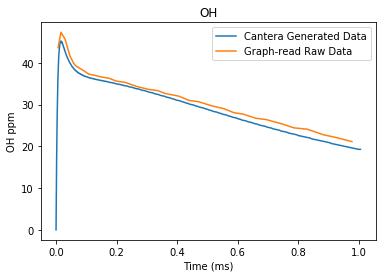

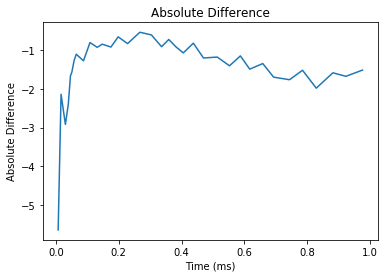

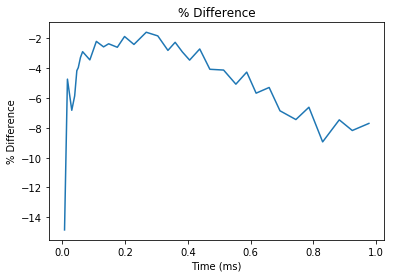

In [38]:
plt.plot(df_cantera_generated['time']*1e3,df_cantera_generated['OH']*1e6,label='Cantera Generated Data')
plt.plot(df_raw_data['time_OH']*1e3,df_raw_data['OH_ppm'],label='Graph-read Raw Data')
plt.legend()
plt.title('OH')
plt.xlabel('Time (ms)')
plt.ylabel('OH ppm')
plt.savefig('plots_for_ron/OH_ppm_3.pdf',bbox_inches='tight',dpi=1000)



interpolated_data = np.interp(df_raw_data['time_OH']*1e3,df_cantera_generated['time']*1e3,df_cantera_generated['OH']*1e6)
absolute_difference = interpolated_data-df_raw_data['OH_ppm'].values
percent_difference = ((interpolated_data-df_raw_data['OH_ppm'].values)/interpolated_data)*100


plt.figure()
plt.plot(df_raw_data['time_OH']*1e3,absolute_difference)
plt.title('Absolute Difference')
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Difference')
plt.savefig('plots_for_ron/OH_ppm_absolute_difference_3.pdf',bbox_inches='tight',dpi=1000)


plt.figure()
plt.title('% Difference')
plt.xlabel('Time (ms)')
plt.ylabel('% Difference')
plt.plot(df_raw_data['time_OH']*1e3,percent_difference)
plt.savefig('plots_for_ron/OH_ppm_percent_difference_3.pdf',bbox_inches='tight',dpi=1000)


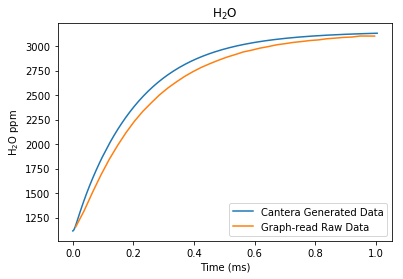

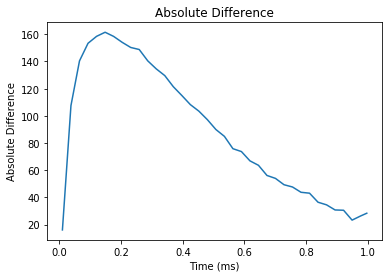

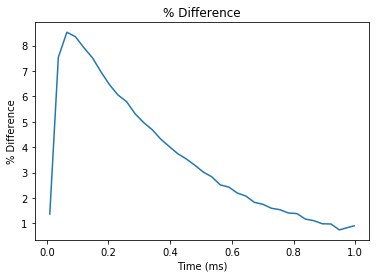

In [39]:
plt.plot(df_cantera_generated['time']*1e3,df_cantera_generated['H2O']*1e6,label='Cantera Generated Data')
plt.plot(df_raw_data['time_H2O']*1e3,df_raw_data['H2O_ppm'],label='Graph-read Raw Data')
plt.title(r'H$_2$O')
plt.xlabel('Time (ms)')
plt.ylabel(r'H$_2$O ppm')
plt.legend()
plt.savefig('plots_for_ron/H2O_ppm_3.pdf',bbox_inches='tight',dpi=1000)



interpolated_data = np.interp(df_raw_data['time_H2O']*1e3,df_cantera_generated['time']*1e3,df_cantera_generated['H2O']*1e6)
absolute_difference = interpolated_data-df_raw_data['H2O_ppm'].values
percent_difference = ((interpolated_data-df_raw_data['H2O_ppm'].values)/interpolated_data)*100


plt.figure()
plt.plot(df_raw_data['time_H2O']*1e3,absolute_difference)
plt.title('Absolute Difference')
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Difference')
plt.savefig('plots_for_ron/H2O_ppm_absolute_difference_3.pdf',bbox_inches='tight',dpi=1000)


plt.figure()
plt.title('% Difference')
plt.xlabel('Time (ms)')
plt.ylabel('% Difference')
plt.plot(df_raw_data['time_H2O']*1e3,percent_difference)
plt.savefig('plots_for_ron/H2O_ppm_percent_difference_3.pdf',bbox_inches='tight',dpi=1000)


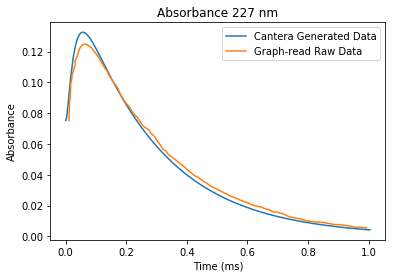

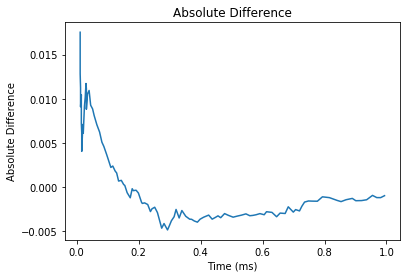

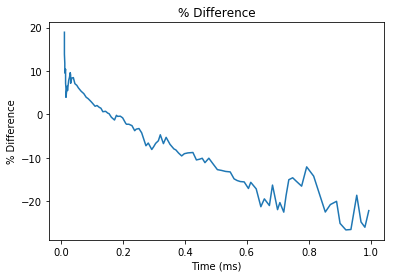

In [40]:
plt.plot(df_cantera_generated['time']*1e3,df_cantera_generated['Absorbance'],label='Cantera Generated Data')
plt.plot(df_raw_data['time_Abs']*1e3,df_raw_data['Abs'],label='Graph-read Raw Data')
plt.title('Absorbance 227 nm')
plt.xlabel('Time (ms)')
plt.ylabel('Absorbance')
plt.legend()
plt.savefig('plots_for_ron/absorbance_3.pdf',bbox_inches='tight',dpi=1000)



interpolated_data = np.interp(df_raw_data['time_Abs']*1e3,df_cantera_generated['time']*1e3,df_cantera_generated['Absorbance'])
absolute_difference = interpolated_data-df_raw_data['Abs'].values
percent_difference = ((interpolated_data-df_raw_data['Abs'].values)/interpolated_data)*100


plt.figure()
plt.plot(df_raw_data['time_Abs']*1e3,absolute_difference)
plt.title('Absolute Difference')
plt.xlabel('Time (ms)')
plt.ylabel('Absolute Difference')
plt.savefig('plots_for_ron/absorbance_absolute_difference_3.pdf',bbox_inches='tight',dpi=1000)


plt.figure()
plt.title('% Difference')
plt.xlabel('Time (ms)')
plt.ylabel('% Difference')
plt.plot(df_raw_data['time_Abs']*1e3,percent_difference)
plt.savefig('plots_for_ron/absorbance_percent_difference_3.pdf',bbox_inches='tight',dpi=1000)


In [20]:
import cantera as ct
import pandas as pd
import numpy as np
def ShockTube(pressure,temperature,conditions,initialTime,finalTime,thermalBoundary):
    gas = ct.Solution('Hong_new_temperature_dep.cti')
    print(gas.reaction_equations()[5])
    k = []
    gas.TPX = temperature, pressure*101325, conditions
    
    if thermalBoundary == 'adiabatic': 
        shockTube = ct.IdealGasConstPressureReactor(gas,name = 'R1',energy= 'on')
    elif thermalBoundary == 'isothermal': 
        shockTube = ct.IdealGasConstPressureReactor(gas,name = 'R1', energy= 'off')
    else:
        raise Exception('Please enter adiabatic or isothermal for the thermal boundary layer')
    
    
    sim=ct.ReactorNet([shockTube])
    


                      
        
    
    columnNames = [shockTube.component_name(item) for item in range(shockTube.n_vars)]  
    columnNames = ['time']+['pressure'] + columnNames
    timeHistory = pd.DataFrame(columns = columnNames)
    
   
    t=initialTime
    counter = 0

    while t < finalTime:
        t = sim.step() 
        state = np.hstack([t, shockTube.thermo.P, shockTube.mass, 
                    shockTube.T, shockTube.thermo.X])
        timeHistory.loc[counter] = state
        k.append(gas.forward_rate_constants[5])
        counter+=1

    return timeHistory,k 

In [21]:
timeHistory,k = ShockTube(1.676,1182,{'H2O2':0.002046 ,'H2O':0.001113,
                                     'O2':0.000556,'Ar':0.995212},0,.001,thermalBoundary='adiabatic')
k[0]*1000

H2O2 + M <=> 2 OH + M


2598156.411299607

In [22]:
k[0]*1000

2598156.411299607

In [23]:
timeHistory,k1 = ShockTube(1.676,1182,{'H2O2':0.002046 ,'H2O':0.001113,
                                     'O2':0.000556,'Ar':0.995212},0,.001,thermalBoundary='adiabatic')

H2O2 + M <=> 2 OH + M


In [24]:
timeHistory2,k2 = ShockTube(1.676,1182,{'H2O2':0.002046 ,'H2O':0.001113,
                                     'O2':0.000556,'Ar':0.995212},0,.001,thermalBoundary='adiabatic')

H2O2 + M <=> 2 OH + M


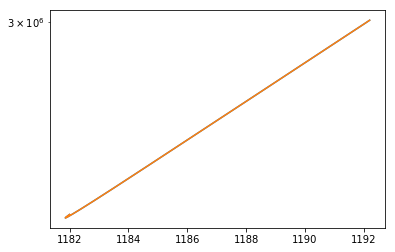

<Figure size 432x288 with 0 Axes>

In [25]:
plt.semilogy(timeHistory['temperature'],np.array(k1)*1000)
plt.semilogy(timeHistory2['temperature'],np.array(k2)*1000)
plt.figure()

k2_interp = np.interp(timeHistory['temperature'],timeHistory2['temperature'],np.array(k2))



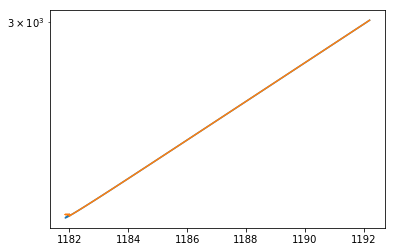

In [26]:
plt.semilogy(timeHistory['temperature'],np.array(k1))
plt.semilogy(timeHistory['temperature'],k2_interp)


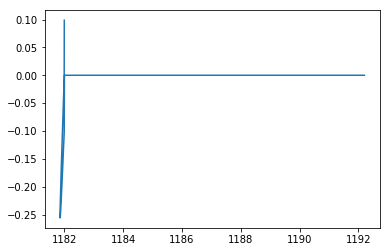

In [27]:
plt.plot(timeHistory['temperature'],((np.array(k1) - k2_interp)/np.array(k1))*100)

In [28]:
2703.6145912254296- 3126.0593585697925

-422.44476734436284